# Initialize

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
import glob
all_files = glob.glob('../testdata/**/*.csv', recursive= True)
to_remove = glob.glob('../testdata/**/*[0-9].csv', recursive= True)

to_keep = [x for x in all_files if x not in to_remove]

In [3]:
to_keep

['../testdata\\ectoderm_info.csv',
 '../testdata\\endoderm_info.csv',
 '../testdata\\mesoderm_info.csv',
 '../testdata\\ecto\\TCGA-BRCA\\brca_data.csv',
 '../testdata\\ecto\\TCGA-GBM\\gbm_data.csv',
 '../testdata\\ecto\\TCGA-SKCM\\skcm_data.csv',
 '../testdata\\endo\\TCGA-COAD\\coad_data.csv',
 '../testdata\\endo\\TCGA-LIHC\\lihc_data.csv',
 '../testdata\\endo\\TCGA-LUAD\\luad_data.csv',
 '../testdata\\endo\\TCGA-PAAD\\paad_data.csv',
 '../testdata\\endo\\TCGA-STAD\\stad_data.csv',
 '../testdata\\endo\\TCGA-THCA\\thca_data.csv',
 '../testdata\\meso\\TCGA-KIRC\\kirc_data.csv',
 '../testdata\\meso\\TCGA-LAML\\laml_data.csv',
 '../testdata\\meso\\TCGA-PRAD\\prad_data.csv',
 '../testdata\\meso\\TCGA-UCEC\\ucec_data.csv']

In [4]:
ecto = pd.read_csv(to_keep[0], delimiter = ' ')
ecto['layer'] = 'Ectoderm'

In [5]:
endo = pd.read_csv(to_keep[1], delimiter = ' ')
endo['layer'] = 'Endoderm'

In [6]:
meso = pd.read_csv(to_keep[2], delimiter = ' ')
meso['layer'] = 'Mesoderm'

In [8]:
all_layers = endo.merge(ecto, how = 'outer')
all_layers = all_layers.merge(meso, how = 'outer')

In [9]:
sum(all_layers.Start_Position == all_layers.End_Position), len(all_layers), sum(all_layers.Start_Position == all_layers.End_Position)/len(all_layers)

(1492084, 1555257, 0.9593809897656786)

In [10]:
all_layers.groupby('layer').mean()

Start_Position  End_Position
layer                                 
Ectoderm    7.924095e+07  7.924096e+07
Endoderm    7.910466e+07  7.910466e+07
Mesoderm    7.854347e+07  7.854347e+07

In [11]:
all_layers.head()

Hugo_Symbol Chromosome  Start_Position  End_Position     layer
0      ATAD3B       chr1         1485803       1485803  Endoderm
1        CHD5       chr1         6146395       6146395  Endoderm
2      IFNLR1       chr1        24159060      24159060  Endoderm
3      IFNLR1       chr1        24159060      24159060  Endoderm
4    ADAMTSL4       chr1       150558533     150558533  Endoderm

In [10]:
all_layers.sort_values('Start_Position')

Hugo_Symbol Chromosome  Start_Position  End_Position     layer
1309449       WASH1       chr9           15996         15996  Mesoderm
1550945       WASH1       chr9           16002         16002  Mesoderm
613133        WASH1       chr9           16035         16035  Ectoderm
282146        WASH1       chr9           17145         17145  Endoderm
282147        WASH1       chr9           17145         17145  Endoderm
...             ...        ...             ...           ...       ...
1085216       PGBD2       chr1       248918269     248918269  Mesoderm
1345546       PGBD2       chr1       248918271     248918271  Mesoderm
561168        PGBD2       chr1       248918338     248918338  Ectoderm
652057        PGBD2       chr1       248918345     248918345  Ectoderm
58731         PGBD2       chr1       248918359     248918359  Endoderm

[1555257 rows x 5 columns]

# Plot

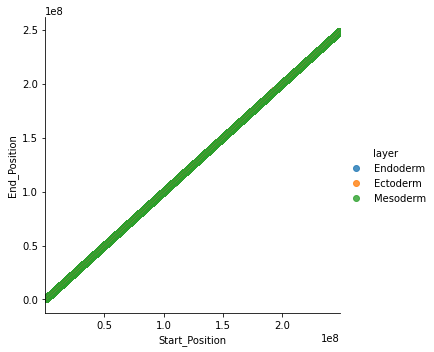

In [13]:
sns.lmplot(x= 'Start_Position', y= 'End_Position', data= all_layers, hue= 'layer')

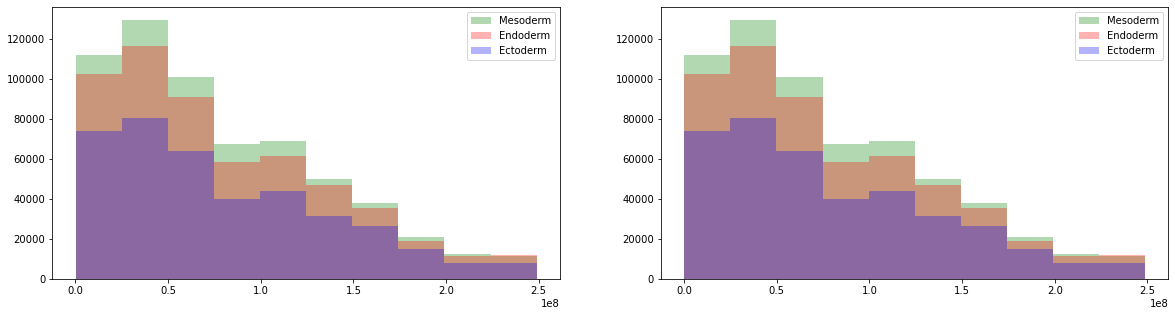

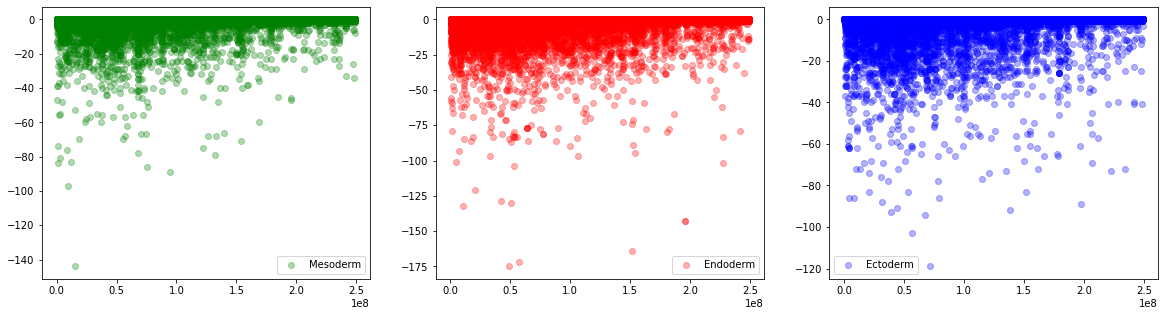

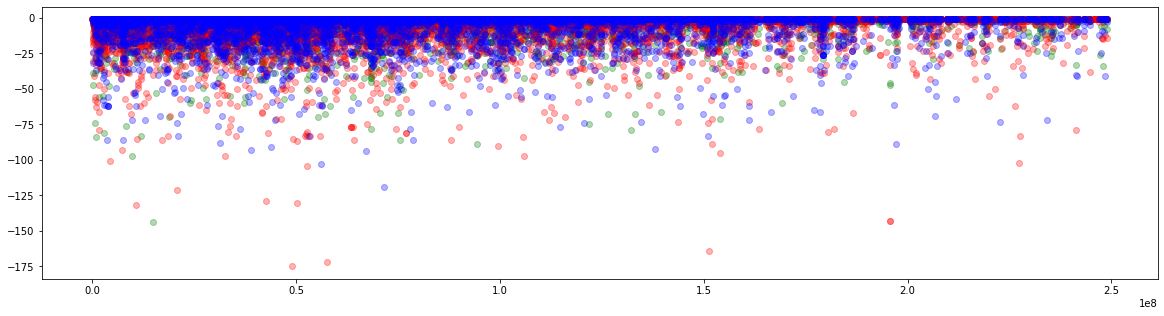

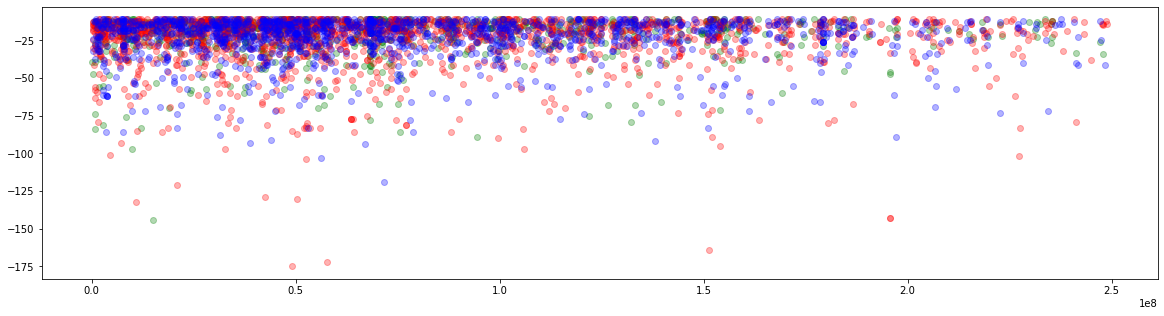

In [21]:
fig, ax = plt.subplots(1,2,  figsize = (20,5))
fig, ax1 = plt.subplots(1,3,  figsize = (20,5))

plt.subplots_adjust(wspace = 0.2)

colors = {'Mesoderm': 'Green', 'Endoderm': 'Red', 'Ectoderm': 'Blue'}
alpha_val = 0.3
layers = ['Mesoderm', 'Endoderm', 'Ectoderm']

starts = []
ends = []

for ind,i in enumerate(layers):
    layer = all_layers.query(f'layer == "{i}"')
    hist1 = ax[0].hist(layer.Start_Position, color = colors[i], alpha = alpha_val, label = i)
    ax[0].legend()
    hist2 = ax[1].hist(layer.End_Position, color = colors[i], alpha = alpha_val, label = i)
    ax[1].legend()
    
    starts.append(hist1); ends.append(hist2)
    
    ax1[ind].scatter(layer.Start_Position, layer.Start_Position - layer.End_Position, 
                     alpha = alpha_val, label = i, color = colors[i])
    ax1[ind].legend()
       

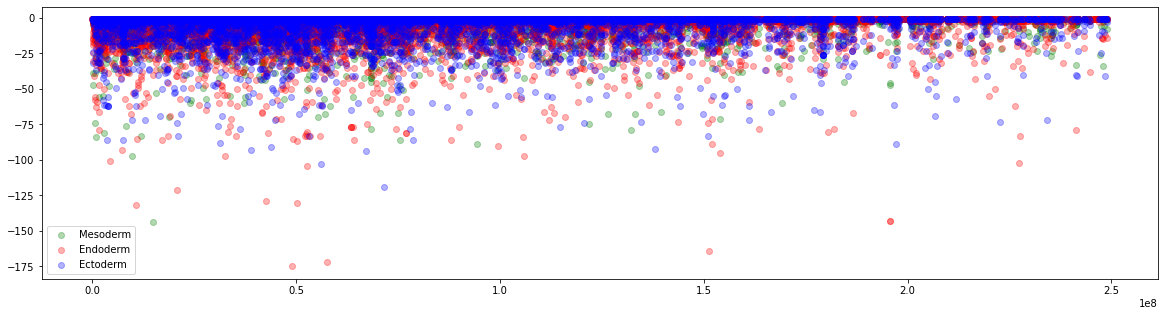

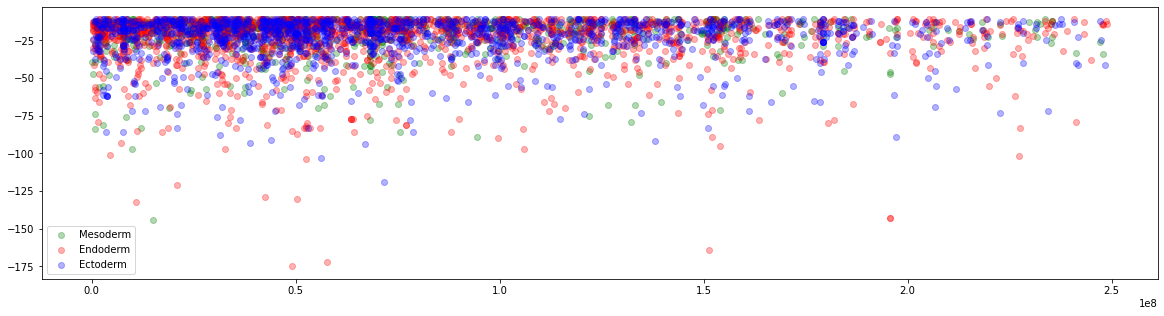

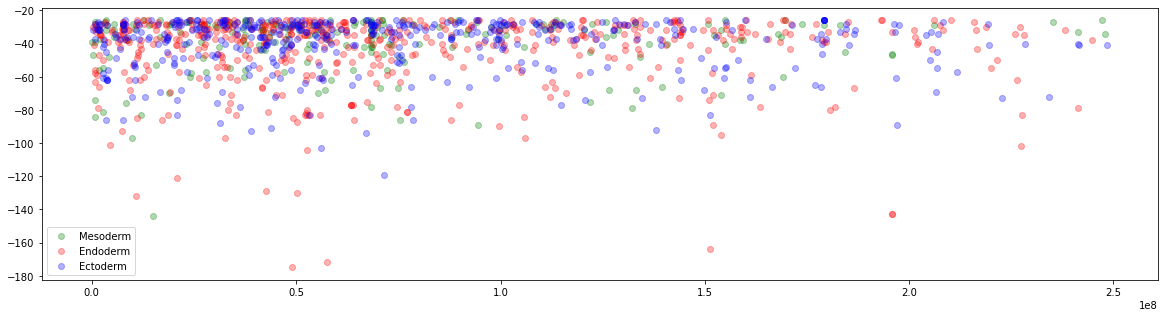

In [103]:
fig, ax2 = plt.subplots(1,1,  figsize = (20,5))
fig, ax3 = plt.subplots(1,1,  figsize = (20,5))
fig, ax = plt.subplots(1,1,  figsize = (20,5))

plt.subplots_adjust(wspace = 0.2)

colors = {'Mesoderm': 'Green', 'Endoderm': 'Red', 'Ectoderm': 'Blue'}
alpha_val = 0.3

for ind,i in enumerate(['Mesoderm', 'Endoderm', 'Ectoderm']):
    layer = all_layers.query(f'layer == "{i}"')
    not_equal = layer.query('Start_Position != End_Position')
    ax2.scatter(not_equal.Start_Position, not_equal.Start_Position - not_equal.End_Position, 
                alpha = alpha_val, label = i, color = colors[i])
    
    
    not_equal = layer.query('End_Position - Start_Position > 10')
    ax3.scatter(not_equal.Start_Position, not_equal.Start_Position - not_equal.End_Position, 
                alpha = alpha_val, label = i, color = colors[i])
    
    not_equal = layer.query('End_Position - Start_Position > 25')
    ax.scatter(not_equal.Start_Position, not_equal.Start_Position - not_equal.End_Position, 
               alpha = alpha_val, label = i, color = colors[i])

ax.legend()
ax2.legend()
ax3.legend() 

In [92]:
layer_cols = {'Mesoderm': "#1f77b4",'Ectoderm': '#2ca02c'}

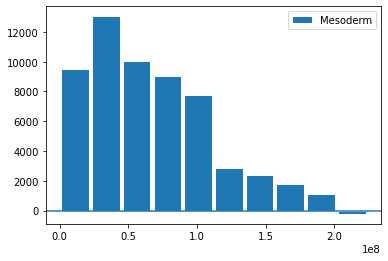

In [156]:
plt.hist(starts[0][1][:-1], weights=diffs[0], ec='white', rwidth=0.9, label = layers[0],
             color = layer_cols[layers[0]])
plt.axhline()
plt.legend()

In [144]:
# diffs = [starts[i][0]-starts[1][0] for i in range(len(starts))]
    
# for ind,i in enumerate(diffs):
#     if ind == 1: continue
#     plt.bar(x = range(len(diffs[0])), height = diffs[ind], label = layers[ind], 
#             color = layer_cols[layers[ind]])  
# plt.legend()

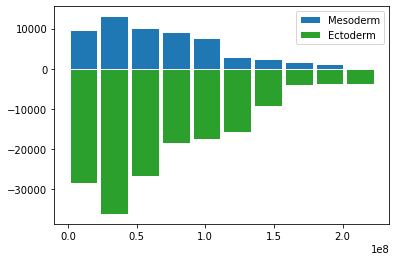

In [96]:
diffs = [starts[i][0]-starts[1][0] for i in range(len(starts))]

for i in range(len(diffs)):
    if i == 1: continue
    plt.hist(starts[0][1][:-1], weights=diffs[i], ec='white', rwidth=0.9, label = layers[i],
             color = layer_cols[layers[i]])
plt.legend()

In [198]:
%matplotlib inline

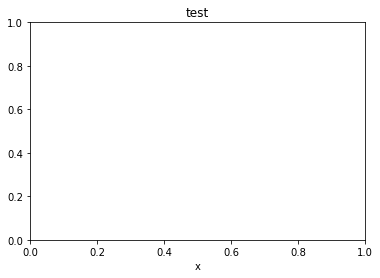

In [208]:
from matplotlib import animation
import random

def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

# fig, ax = plt.subplots()
# xdata, ydata = [random.random() for _ in range(20)], [random.random() for _ in range(20)]
# ln, = plt.plot([], [], 'ro')

# def init():
#     ax.set_xlim(0, 2*np.pi)
#     ax.set_ylim(-1, 1)
#     return ln,

# def update(frame):
#     xdata.append(frame)
#     ydata.append(np.sin(frame))
#     ln.set_data(xdata, ydata)
#     return ln,

# ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
#                     init_func=init, blit=True)
# plt.show()

fig1 = plt.figure()

# Fixing random state for reproducibility
np.random.seed(19680801)

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=5, blit=True)

In [212]:
from scipy import stats

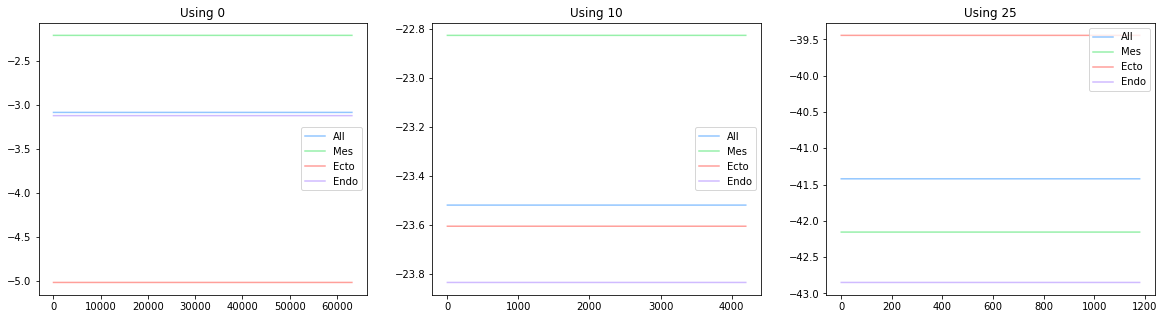

In [223]:
values = [0,10,25]
fig, ax = plt.subplots(1,len(values), figsize = (20,5))

for ind, difference in enumerate(values):

    greater_all = all_layers.query(f'End_Position - Start_Position > {difference}')
    regress_vals = stats.linregress(greater_all.Start_Position, greater_all.Start_Position - greater_all.End_Position)
    ax[ind].plot(range(len(greater_all)), range(len(greater_all))*regress_vals.slope + regress_vals.intercept, 
                 label = 'All')


    greater_meso = all_layers.query(f'(End_Position - Start_Position > {difference}) and (layer == "Mesoderm")')
    greater_ecto = all_layers.query(f'(End_Position - Start_Position > {difference}) and (layer == "Ectoderm")')
    greater_endo = all_layers.query(f'(End_Position - Start_Position > {difference}) and (layer == "Endoderm")')


    regress_vals = stats.linregress(greater_meso.Start_Position, greater_meso.Start_Position - greater_meso.End_Position)
    ax[ind].plot(range(len(greater_all)), range(len(greater_all))*regress_vals.slope + regress_vals.intercept, 
                 label = 'Mes')

    regress_vals = stats.linregress(greater_ecto.Start_Position, greater_ecto.Start_Position - greater_ecto.End_Position)
    ax[ind].plot(range(len(greater_all)), range(len(greater_all))*regress_vals.slope + regress_vals.intercept, 
                 label = 'Ecto')

    regress_vals = stats.linregress(greater_endo.Start_Position, greater_endo.Start_Position - greater_endo.End_Position)
    ax[ind].plot(range(len(greater_all)), range(len(greater_all))*regress_vals.slope + regress_vals.intercept, 
                 label = 'Endo')

    ax[ind].legend()
    ax[ind].set_title('Using ' + str(difference))


Slopes are almost 0 for all of them so main differentiating factor is the intercepts.

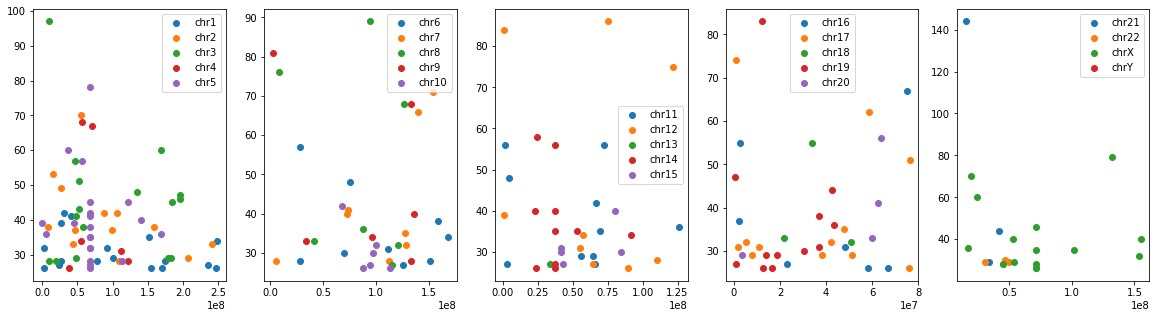

In [142]:
fig,ax = plt.subplots(1,5,  figsize = (20,5))
for ind, chrome in enumerate(all_layers.Chromosome.unique()):
    chrom = all_layers.query(f'(Chromosome == "{chrome}") and (layer == "Mesoderm") \
                             and (End_Position - Start_Position > 25)')
    ax[ind//5].scatter(chrom.Start_Position, chrom.End_Position - chrom.Start_Position, label = chrome)

    
for ind in range(0,5):
    ax[ind].legend()

Multiples of 5, especially 5 and 10, are almost all straight up. No Y and X is all over.

# Current

In [167]:
all_layers.head()

Hugo_Symbol Chromosome  Start_Position  End_Position     layer
0      ATAD3B       chr1         1485803       1485803  Endoderm
1        CHD5       chr1         6146395       6146395  Endoderm
2      IFNLR1       chr1        24159060      24159060  Endoderm
3      IFNLR1       chr1        24159060      24159060  Endoderm
4    ADAMTSL4       chr1       150558533     150558533  Endoderm

In [179]:
hugo_grouped = all_layers.groupby(['Hugo_Symbol', 'layer']).size().unstack(fill_value = 0)
hugo_grouped

layer        Ectoderm  Endoderm  Mesoderm
Hugo_Symbol                              
A1BG                8        24        25
A1CF               67        34        50
A2M                60        93        89
A2ML1              66       114        89
A3GALT2             1        14         5
...               ...       ...       ...
ZYG11B             17        33        35
ZYX                18        18        29
ZZEF1              63        88       136
ZZZ3               17        43        38
pk                 18        28        37

[19313 rows x 3 columns]

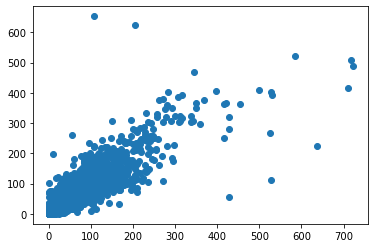

In [189]:
plt.scatter(hugo_grouped.Endoderm[hugo_grouped.Endoderm<1000], hugo_grouped.Mesoderm[hugo_grouped.Endoderm<1000])

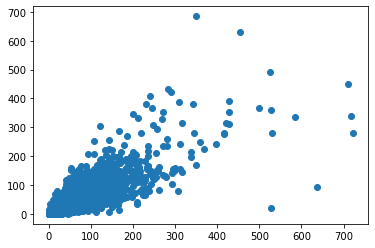

In [190]:
plt.scatter(hugo_grouped.Endoderm[hugo_grouped.Endoderm<1000], hugo_grouped.Ectoderm[hugo_grouped.Endoderm<1000])

RuntimeError: Requested MovieWriter (ffmpeg) not available

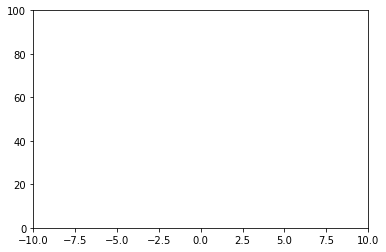

In [218]:
fig = plt.figure()

ax = plt.axes(xlim=(-10, 10), ylim=(0, 100))

N = 4
points = ax.plot( *([[], []]*N), marker="o")

def init():    
    for line in points:
        line.set_data([], [])
    return points

def animate(i):
    points[0].set_data([0],[i])
    points[1].set_data([[1],[i+1]])
    points[2].set_data([[2],[i+2]])
    points[3].set_data([[3],[i+3]])
    return points

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# plt.show()
from IPython.display import HTML
HTML(anim.to_html5_video())

# Later

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [39]:
# def dbscan(X, eps, min_samples):
# #     ss = StandardScaler()
# #     X = ss.fit_transform(X)
#     db = DBSCAN(eps=eps, min_samples=min_samples)
#     y_pred = db.fit_predict(X)
#     plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
#     plt.title("DBSCAN")
    
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    y_pred = db.predict(X)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 0],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

In [40]:
dbscan(data, eps=2, min_samples =3)

MemoryError: 

In [63]:
diffs

[array([ 9526., 13056., 10068.,  9073.,  7754.,  2890.,  2422.,  1753.,
         1119.,  -225.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-28370., -36114., -26691., -18468., -17482., -15727.,  -9222.,
         -4092.,  -3770.,  -3814.])]

In [15]:
len(data)

1555257

In [30]:
### Get all the features columns except the class
features = list(all_layers.columns)[2:4]
# Get the features data
data = all_layers[features]

In [45]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)


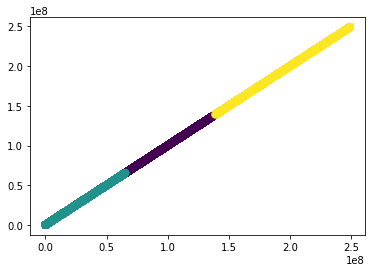

In [49]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[0], centers[1], c='black', s=200, alpha=0.5);
plt.show()

In [47]:
clustering_kmeans = KMeans(n_clusters=3, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data)

C:\Users\Shonak\capstone_180a\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


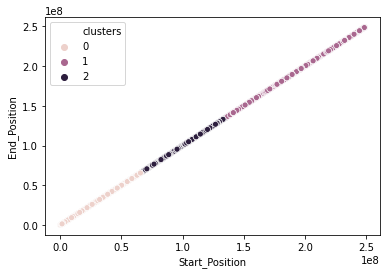

In [48]:
sns.scatterplot(x=data['Start_Position'], y=data["End_Position"], hue=data['clusters'])
plt.show()

In [75]:
from sklearn.cluster import DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN